In [1]:
import sys
sys.path.append("..")

import torch
import torch.optim as optim

import matplotlib.pyplot as plt

from datasets import *
from models.ad_models import *

torch.manual_seed(1234)

In [2]:
model = VaeADModel()
state_dict = torch.load("../_dump/vae_mvtec_transistor_best.pt")["model_state_dict"]
model.load_state_dict(state_dict)
model.eval()
;

''

In [3]:
dataloader = get_ad_dataloader("mvtec", "vae", batch_size = 12, category="transistor", split="test")
for batch in dataloader:
    break

In [4]:
batch[2]

tensor([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [5]:
with torch.no_grad():
    x = batch[0]
    out = model(x)

In [6]:
out.alpha.flatten(1).max(dim=1).values

tensor([0.6019, 0.6285, 0.5128, 0.7022, 0.6498, 0.5741, 0.4905, 0.7079, 0.7599,
        0.5768, 0.7696, 0.6736])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

<Figure size 640x480 with 0 Axes>

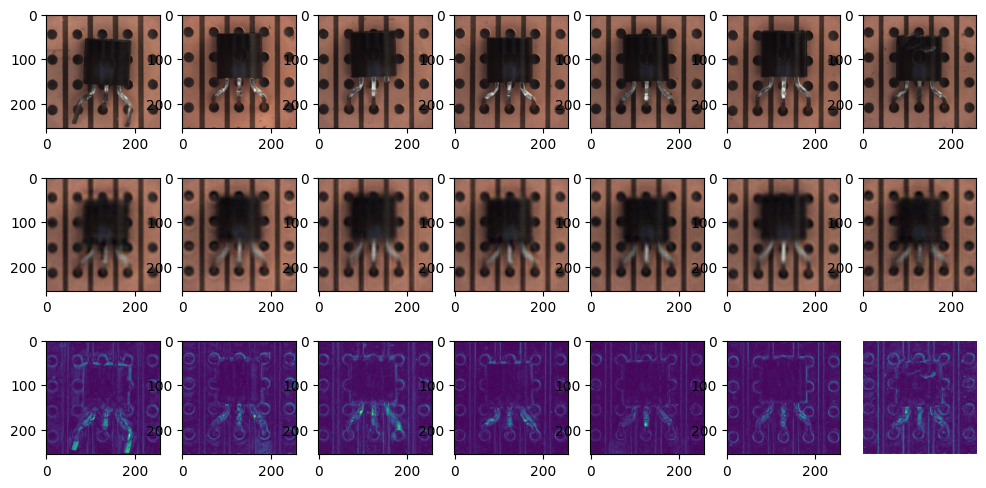

In [11]:
plt.clf()

fig, ax = plt.subplots(3,7, figsize=(12, 6))
for i in range(7):
    ax[0,i].imshow(x[i].detach().numpy().transpose(1,2,0))
    ax[1,i].imshow(out.other["xhat"][i].detach().numpy().transpose(1,2,0))
    ax[2,i].imshow(out.alpha[i].max(dim=0).values.detach().numpy())
    